# Vorbereitung auf die DAT - Labore

### Vorwissen:
Ich erwarte ein gewisses Vorwissen in Statistik (Basics aus MA3). Dies können Sie sich zum Beispiel aneignen durch:
- Kopp-Schneider, Werft "Grundlagen der Statistik" in Medizinische Physik: https://link.springer.com/book/10.1007%2F978-3-662-54801-1
(pdf des Kapitels auch auf moodle)

### Literatur für die ersten Labore: 
- Bruce et al. Praktische Statistik für Data Scientists, Kapitel 1 bis 3
- Sauer, Moderne Datenanalyse mit R:
    - Wir machen ein Teil der Analyse aus Kapitel 10 mit Python
    - später Kapitel 17 (und Teile aus 15-16)
- Python-Dokumentationen, z.B. VanderPlas: Data Science mit Python

### Sie werden hier:
- Erste Schritte in python gehen $\rightarrow$ Test Ihrer Python-Umgebung, evtl. Aneignen oder Auffrischen grundlegender Python Kenntnisse zum Daten laden und visualisieren
- Hinweise erhalten, auf welcher Theorie die ersten Labore aufbauen $\rightarrow$ Möglichkeit zur Vorbereitung und/oder zur Auffrischung von Vorwissen

### Lernziele:
- Sie können den NYCFlights Datensatz laden und den gekürzten Datensatz in einem DataFrame darstellen. Sie wissen zudem wie eine Tabelle mit Daten für eine Datenanalyse aussehen sollte. 
- Sie können Daten mit seaborn als Balkendiagramm, Boxplot, Violinplot und kategorialen Barplot darstellen.
- Sie können deskriptive Statistiken berechnen und bewerten.


In [1]:
# Import nötiger Module

# Daten einlesen und Daten verarbeiten
import pandas as pd

# Plotten
import matplotlib.pyplot as plt
import seaborn as sns  # zum (einfacheren) Erstellen guter statistischer Plots

sns.set_theme()  # alle Plots (auch von matplotlib) im seaborn-Style

# Numerische und statistisches Werkzeug
import numpy as np
from scipy import stats

## 1. Vorbereitung der Daten: NYCFlights Datensatz
Ein in vielen Data Science Lehrbüchern und Anleitungen verwendeter Datensatz sind Flugdaten von New York City aus dem Jahr 2013. Diesen Datensatz werden wir in vielen Laboren verwenden, um uns verschiedene Aspekte von Datenanalysen anzuschauen. 

Wir nutzen in den ersten Laboren eine gekürzte Version des Datensatzes, da wir alle Beobachtungen mit fehlenden Werten erst einmal löschen. Andere Varianten mit fehlenden Werten umzugehen (Feature Engineering) schauen wir uns später an.



In [3]:
"""
Laden des Datensatzes. Er liegt als DataFrame vor: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
DataFrames ermöglichen das (schnelle) Arbeiten auch mit größeren Datensätzen.
Doku des R-Packages: https://nycflights13.tidyverse.org/reference/flights.html

Zu diesem Datensatz gibt es dann noch weitere Infodatensätze, z.B. zu den Flughäfen:  https://nycflights13.tidyverse.org/reference/airports.html
>>> from nycflights13 import airports

"""
from nycflights13 import flights

# Vorschau von Daten in einem DataFrame:
flights.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


### Aussehen einer Datentabelle
Sie sehen nun eine Tabelle mit Daten. So sollte zunächst bei jeder Datenanalyse der vorbereitete Datensatz aussehen.
Es gelten folgende Konventionen:
- jede Zeile enthält eine Beobachtung (engl. observation), hier einen Flug
- jede Spalte enthält eine Variable (engl. variable, feature...). Diese können kategorial aber auch kontinuierlich sein. Ordnen Sie zu und wenn unbekannt, recherchieren Sie mögliche Datentypen! 
- Bei jeder Datenanalyse sollten Sie ein sog. "Code Book" führen, in dem auch festgehalten ist, was die verschiedenen Variablen bedeuten. Infos zu den vorliegenden Daten (was bedeutet dep_time, welche Einheit...) finden Sie in der oben verlinkten Doku zum korrespondierenden R-Paket

### Kürzen des Datensatzes
Da der Datensatz viele fehlende Werte enthält und wir uns zunächst auf die Visualisierung und deskriptive Statistik konzentrieren wollen, löschen wir zunächst alle Zeilen mit fehlenden Werten und verwenden einen gekürzten Datensatz.



In [4]:
# Herausfinden welche Spalte wie viele fehlende Werte, die als nans (not a number) kodiert sind, enthält:
print(flights.isna().sum())

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64


In [5]:
# Mit fehlenden Werten beschäftigen wir uns später. Hier nutzen wie zunächst den gekürzten Datensatz und werfen alle Zeilen mit fehlenden Werten raus.

fls = flights.dropna()  # fls = flights ohne NaNs, das ist unser Datensatz für die ersten Gehversuche mit Visualisierungen, Gruppierungen und deskriptiven Statistiken

# Wie viele Zeilen wurden gelöscht?
number_deleted = len(flights) - len(fls)
number_deleted_percent = np.round(number_deleted / len(flights) * 100, 2)
print(f"Anzahl gelöschter Zeilen: {number_deleted} von {len(flights)} ({number_deleted_percent}%)")
fls.head()

Anzahl gelöschter Zeilen: 9430 von 336776 (2.8%)


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


## 2. Erste Python Schritte zur Datenvisualisierung

Wir starten DAT mit der explorativen Datenanalyse, d.h. es geht darum einen Überblick über den vorliegenden Datensatz zu bekommen. Das geht besonders gut durch Visualisierungen. Daher hier zunächst der Test, ob bei Ihnen alle nötigen Pakete installiert sind und funktionieren. Zudem können Sie starten sich in die Syntax einzuarbeiten.

Einige werden `matplotlib` kennen. Für statistische Datenvisualisierungen ist das Paket `seaborn` sehr nützlich. Es basiert auf `matplotlib`. Es vereinfacht sehr viele Vorgänge und liefert überaus nützliche und hochwertige Graphen: 
https://seaborn.pydata.org/index.html

Ändern von Darstellung und Beschriftung etc. basiert auf matplotlib. Die Dokumentation finden Sie unter: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html



### Visualisierung kategorieller Daten

Wir nutzen hierfür `seaborn`, da dort Graphentypen vorliegen, die die Kategorisierung vornehmen. Alternativ geht das auch, wenn man die Werte mit `pandas` kategorisiert und dann nur mit `matplotlib` darstellt. Die Visualisierung und damit das Gewinnen eines Überblicks über den vorliegenden Datensatz ist immer der erste Schritt einer Datenanalyse, die sog. explorative Datenanalyse. Hier geht es nicht darum, Schlüsse zu ziehen oder Vorhersagen zu treffen, sondern die vorliegenden Daten verstehen zu lernen.


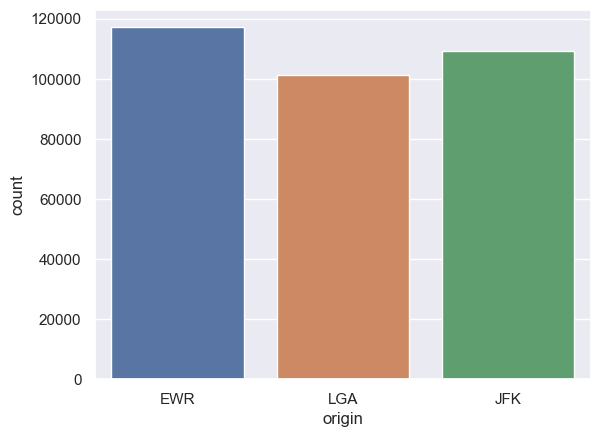

In [6]:
# Visualisierung von kategorialen Features mit seaborn:
# seaborn hat eine Funktion, die die Anzahl der Werte zählt und als Balkendiagramm darstellt. Hier ein Graph, der die Anzahl der Flüge zählt, die von den verschiedenen Abflughäfen starten:
sns.countplot(data=fls, x='origin')
plt.show()  # zeigt die Grafik an, ohne die Objektinformationen auszugeben

Um mehrere Graphen nebeneinander/untereinander darzustellen eignen sich subplots. Hier ein Beispiel mit 3 Graphen nebeneinander. Die Position ergibt sich dann aus `ax=axs[0]` etc. 

#### Aufgabe: 
- Wählen Sie zwei weitere Kategorien aus der Tabelle aus und fügen Sie einen Graphen mit anderer Kategorisierung zu `axs[1]` und `axs[2]` hinzu
- Erstellen Sie passende Titel für die Graphen



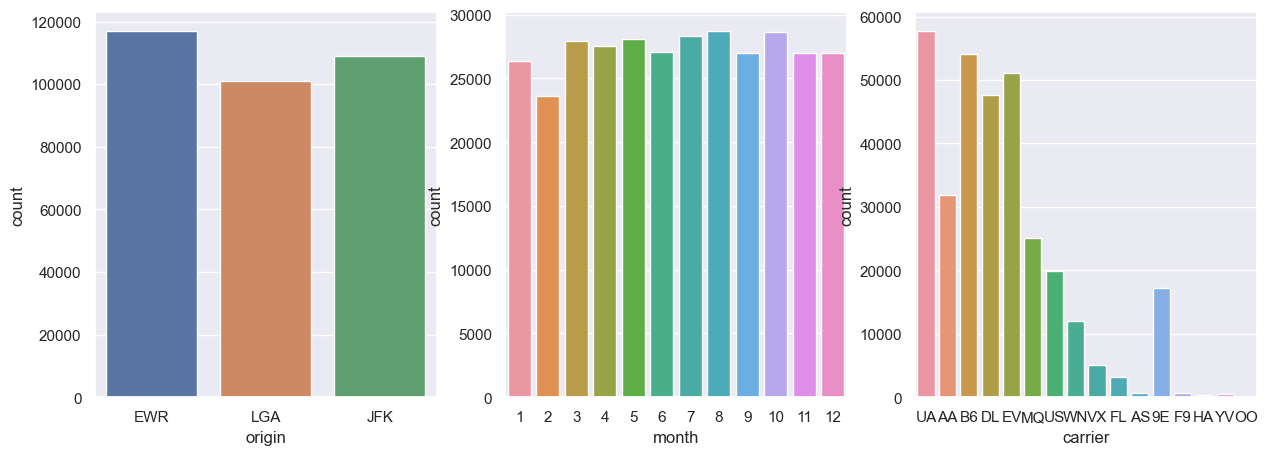

In [11]:
#3 Balkendiagramme zu Abflughafen, 'Ihre Auswahl' und 'Ihre Auswahl':

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(data=fls, x='origin', ax=axs[0])
#TODO: Graphen für axs[1] und axs[2] hinzufügen
#TODO: Titel für die Graphen hinzufügen
sns.countplot(data=fls, x='month',ax=axs[1])
sns.countplot(data=fls, x='carrier',ax=axs[2])
plt.show()


### Zusammenfassung kontinuierlicher Variablen

Die Flugverspätung `arr_delay` ist eine kontinuierliche Variable, d.h. es gibt eine große Anzahl (prinzipiell unendlich viele) unterschiedliche Werte.
Die Darstellung erfolgt dann in einem Histogramm, die Werte werden in Klassen (engl. bins) zusammengefasst.

C:\Users\pawel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


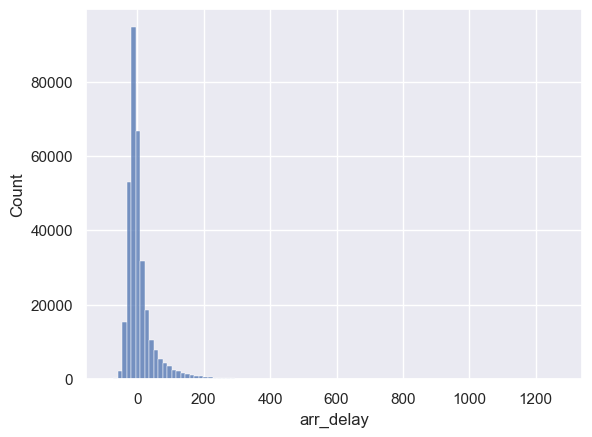

In [12]:
sns.histplot(data=fls, x='arr_delay', bins=100)
plt.show()

Hier schauen wir zunächst auf zusammenfassende Statistiken wie Mittelwert, Standardabweichung, Median, Quantile etc. Wenn Ihnen diese Begriffe nicht bekannt sind, lesen Sie bitte in einem Statistikbuch nach. Verständnis und Interpretation üben wir in der nächsten Vorlesung.

Verschiedene Module bieten Zusammenfassungen von Statistikdaten.
Hier finden Sie einige Dokumentationen: 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html
https://www.statsmodels.org/stable/generated/statsmodels.stats.descriptivestats.describe.html#statsmodels.stats.descriptivestats.describe


#### Wichtiger Hinweis zur Berechnung von Varianzen und Standardabweichungen
Verschiedene Bibliotheken verwenden verschiedene Vorfaktoren für die Berechnung von Streuparametern. Traditionell wird in der deskriptiven Statistik der Vorfaktor $\frac{1}{n}$ verwendet. Damit sind die Metriken aber nicht erwartungstreu. Daher sollte, wie in der schließenden Statistik üblich, der Vorfaktor $\frac{1}{n-1}$ verwendet werden. Gekennzeichnet wird das über den Parameter ddof (delta degrees of freedom): ddof=0 für $\frac{1}{n}$ und ddof=1 für $\frac{1}{n-1}$. 

Pandas: ddof=1
scipy: ddof=0
numpy: ddof=0


In [13]:
#Calculate descriptive statistics using pandas for fls["arr_delay"]. As fls is a pandas dataFrame this is a pandas method.
print(fls["arr_delay"].describe())

count    327346.000000
mean          6.895377
std          44.633292
min         -86.000000
25%         -17.000000
50%          -5.000000
75%          14.000000
max        1272.000000
Name: arr_delay, dtype: float64


In [19]:
# Calculate descriptive statistics using scipy for fls["arr_delay"]. Be aware to correct for ddof=1!
stats.describe(fls["arr_delay"], ddof=0)

DescribeResult(nobs=327346, minmax=(-86.0, 1272.0), mean=6.89537675731489, variance=1992.1246413983508, skewness=3.716800448835242, kurtosis=29.232579155522792)

### Visualisierung zusammengefasster kontinuierlicher Daten nach Kategorie

Es gibt verschiedene Möglichkeiten Zusammenfassungen von kontinuierlichen Daten nach Kategorien darzustellen. Hier drei schöne Beispiel aus seaborn im Vergleich:
- Boxplot: grafische Übersicht der wichtigsten Quantile. Praktischerweise dann auch für verschiedene Kategorien einer Variable getrennt möglich
- Violinplot: kombiniert Dichteschätzer und Boxlot (Box nimmt Form der geschätzten Dichtefunktion an)
- Kategoriale Barplots verschiedener Metriken (Mittelwert, Median, etc.)



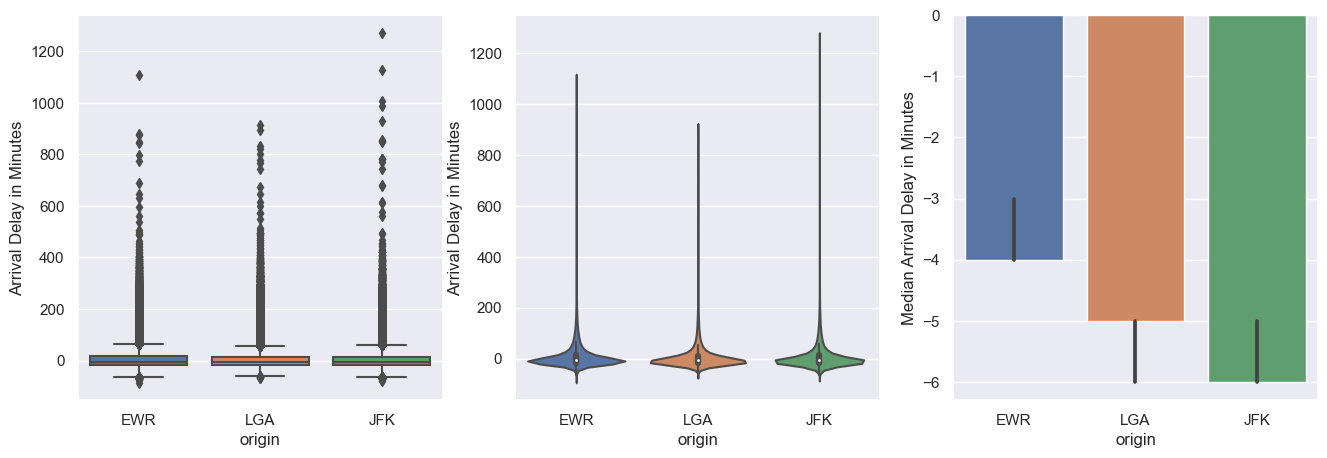

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5))

sns.boxplot(x="origin", y="arr_delay", data=fls, ax=axs[0])
sns.violinplot(x="origin", y="arr_delay", data=fls, ax=axs[1])
sns.barplot(data=fls, x="origin", y="arr_delay", estimator="median", ax=axs[2])

axs[0].set_ylabel('Arrival Delay in Minutes')
axs[1].set_ylabel('Arrival Delay in Minutes')
axs[2].set_ylabel('Median Arrival Delay in Minutes')

plt.show()


##### Überlegen Sie:
- Was zeigen die verschiedenen Graphen? $\rightarrow$ Lesen Sie ggf. nach, wie die verschiedenen Graphen definiert sind
- Welche Vor- und Nachteile haben die verschiedenen Graphen? 


### Lageparameter im Vergleich
Im Balkendiagramm können verschiedene statistische Größen gezeigt werden. Unten zwei Graphen, die die Lageparameter Mittelwert und Median nebeneinander stellen. 
 
##### Überlegen Sie:
- Welche Unterschiede sehen Sie? 
- Woran könnte das liegen?


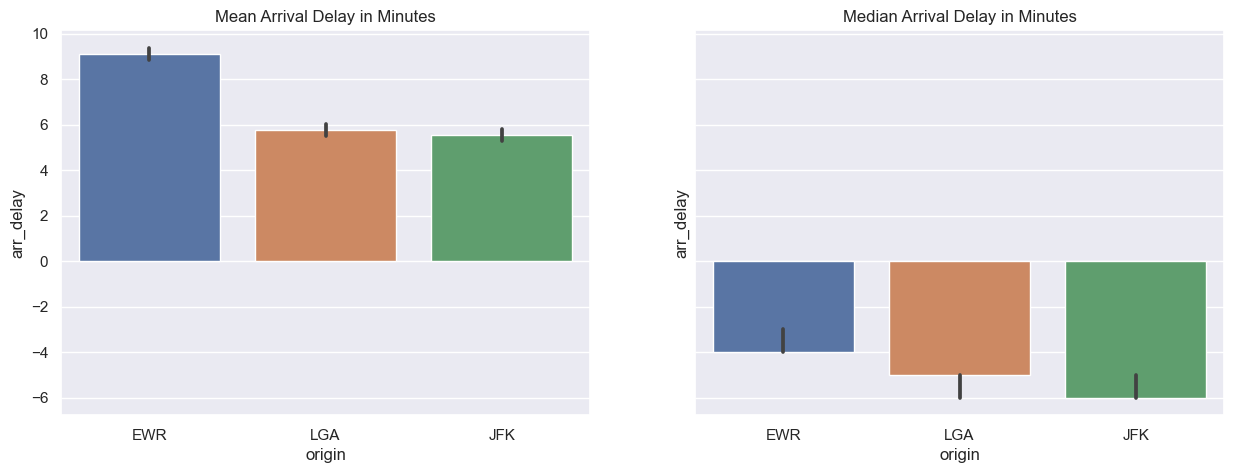

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.barplot(data=fls, x="origin", y="arr_delay", ax=axs[0])  # Mittelwert, Fehlerbalken werden defaultmäßig angezeigt 
sns.barplot(data=fls, x="origin", y="arr_delay", estimator='median', ax=axs[1])  # Median

axs[0].set_title('Mean Arrival Delay in Minutes')
axs[1].set_title('Median Arrival Delay in Minutes')

plt.show()

## 3. Weitere Untersuchung des Datensatzes

Nutzen Sie die Ihnen bekannten Mehoden, um den Datensatz weiter zu untersuchen.

In [ ]:
# TODO: Weitere Daten visualisieren und Statistiken berechnen